In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split

In [179]:
train_set = pd.read_csv('E:/DataSets/Train_BigMart.csv')
test_set = pd.read_csv('E:/DataSets/Test_BigMart.csv')

In [180]:
train_set.shape, test_set.shape
train_set

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [182]:
train_set['Item_Weight'].fillna((train_set['Item_Weight'].mean()), inplace=True)
train_set['Item_Visibility'] = train_set['Item_Visibility'].replace(0,np.mean(train_set['Item_Visibility']))
train_set['Outlet_Establishment_Year'] = 2013 - train_set['Outlet_Establishment_Year']
train_set['Outlet_Size'].fillna('Small',inplace=True)


# creating dummy variables to convert categorical into numeric values
#mylist = list(train_set.select_dtypes(include=['object']).columns)
#dummies = pd.get_dummies(train_set[mylist], prefix= mylist)

#train_set.drop(mylist, axis=1, inplace = True)

#X = pd.concat([train_set,dummies], axis =1 )

In [183]:
train_set

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.066132,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350


In [184]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()


In [185]:
x = train_set.loc[:,['Outlet_Establishment_Year','Item_MRP','Item_Weight','Outlet_Establishment_Year']]
#x = train_set.drop('Item_Outlet_Sales', 1)
x.head()

,Outlet_Establishment_Year,Item_MRP,Item_Weight,Outlet_Establishment_Year
0,1999,249.8092,9.30,1999
1,2009,48.2692,5.92,2009
2,1999,141.6180,17.50,1999
3,1998,182.0950,19.20,1998
4,1987,53.8614,8.93,1987


In [186]:
x_train, x_cv, y_train, y_cv = train_test_split(x, train_set.Item_Outlet_Sales, test_size = 0.3)

In [187]:
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((5966, 4), (2557, 4), (5966,), (2557,))

In [188]:
lreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [189]:
pred = lreg.predict(x_cv)

In [141]:
mse = np.mean((pred - y_cv)**2 )
mse

1969509.6076695619

In [190]:
coeff = DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-4.682348
1,Item_MRP,15.465118
2,Item_Weight,-0.594101
3,Outlet_Establishment_Year,-4.682348


In [191]:
lreg.score(x_cv, y_cv)

0.31805142047497681

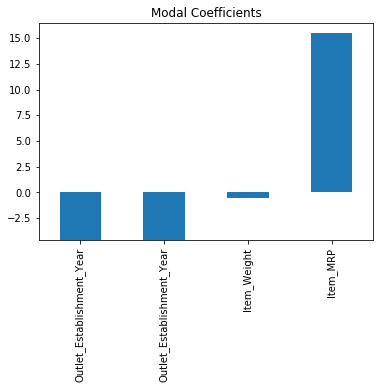

In [192]:
predictors = x_train.columns
coef = Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients' )

In [193]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha = 0.05, normalize = True)

In [194]:
ridgeReg.fit(x_train, y_train)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [195]:
pred = ridgeReg.predict(x_cv)

In [196]:
mse = np.mean((pred - y_cv) ** 2)
mse

2099549.0888365754

In [197]:
ridgeReg.score(x_cv, y_cv)

0.31672664996314603